In [1]:
from nt_toolbox.general import *
from nt_toolbox.signal import *
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
name = 'barbara.jpg'
M = load_image(name)

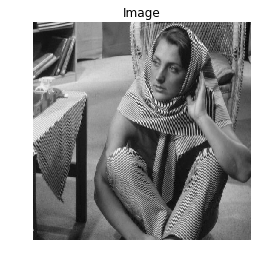

In [3]:
imageplot(M, 'Image')

## 1.Perform a spectral analysis

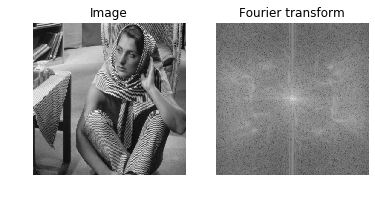

In [4]:
Mf = fft2(M) #fourrier transform
Lf = fftshift(Mf) # put the low frequence in the center
imageplot(M, 'Image', [1, 2, 1])
imageplot(np.log(abs(Lf)), 'Fourier transform', [1, 2, 2])# log for decrease the difference

##  2.Resize the image to get a smaller image of half size 

### -in the space domain by subsampling

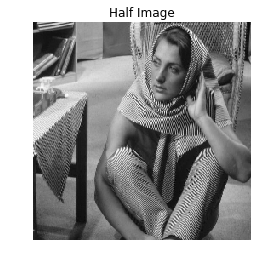

In [5]:
Mc = M[::2,::2]
imageplot(Mc, 'Half Image', [1, 1, 1])

### -by resizing in the Fourier domain

In [6]:
#By get the center region of fourier graph, decrease the size and get the principal information

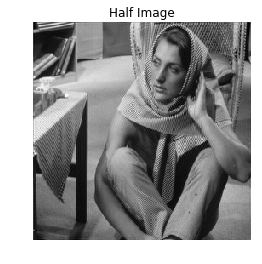

In [7]:
Mf = ifft2(ifftshift(Lf[128:384:, 128:384]))
imageplot(abs(Mf), 'Half Image', [1, 1, 1])
# lll = Lf[128:384:, 128:384]
# imageplot(np.log(abs(lll)), 'Fourier transform', [1, 2, 2])

## 3.Resize the image to get a bigger image of double size
### -by sinc interpolation (zero padding in the Fourier domain)

In [8]:
# It doesnt work like this, because all the value is in real
# Lp = zeros([1024,1024])
# Lp[256:768:,256:768:] = Lf
Lp = np.pad(Lf,((256,256),(256,256)),'constant',constant_values = 0)

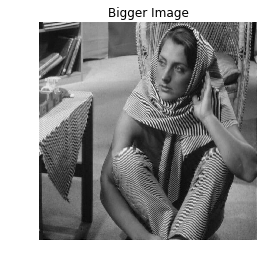

In [9]:
Mp = ifft2(ifftshift(Lp))
imageplot(abs(Mp), 'Bigger Image', [1, 1, 1])


### -by linear interpolation in the space domain

In [10]:
Mb = zeros([1024,1024])
Mb[::2,::2] = M


In [11]:
# insert between column
Mb[::2,1:-1:2] = 1/2*(Mb[::2,:-2:2]+Mb[::2,2::2])
#insert between row
Mb[1:-1:2,::2] = 1/2*(Mb[:-2:2,::2]+Mb[2::2,::2])
#insert the corner
Mb[1:-1:2,1:-1:2] = 1/2*(Mb[:-2:2,1:-1:2]+Mb[2::2,1:-1:2])

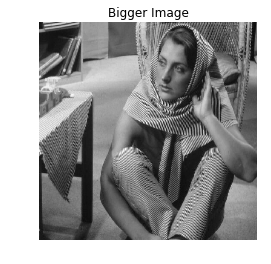

In [12]:
imageplot(Mb, 'Bigger Image', [1, 1, 1])


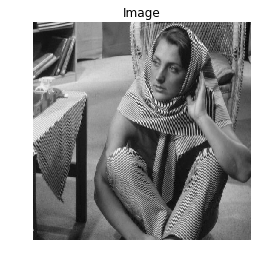

In [13]:
imageplot(M, 'Image', [1, 1, 1])


In [14]:
Mb.shape

(1024, 1024)